In [1]:
import depoML

import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [2]:
def sampleGen(num, sigma, mu):
    # bins = 100
    samples = np.multiply(np.random.randn(int(1e5), num), sigma) + mu
    sampleFlat = samples.reshape(-1)
    # dist = np.histogram(samples, bins, range=[0.0, 0.22])
    return sampleFlat

20
(20,)
(20,)
---------------------
True
True
[1918.80766184 2046.64777005 2276.39815319 2318.0064903  2343.33330419
 2486.85191623 2549.56593158 2662.9335747  2785.94952788 2837.20617504
 3017.50896916 3017.50896916 3135.09774793 3162.23361996 3219.5204609
 3265.34993365 3242.43519728 3340.72735594 3322.63677459 3360.02397605
 3334.69716216 3252.68652671 3205.04799582 3113.99206969 3089.26827518
 3103.13772088 2950.57381816 2919.81982987 2853.48769825 2778.11027596
 2712.9841831  2676.20000103 2599.61653998 2552.58102847 2497.10324566
 2419.91676524 2456.09792793 2318.0064903  2295.09175392 2272.17701754
 2247.45322303 2193.78449836 2156.39729691 2093.68328156 2160.61843255
 2143.73388996 2147.95502561 2122.02519234 2182.93014955 2220.92037039
 2215.49319598 2306.54912211 2250.46831992 2296.29779268 2307.15214149
 2293.88571516 2324.63970346 2475.39454804 2464.54019923 2488.05795499
 2558.61122225 2579.71690049 2669.56678786 2654.49130341 2706.35096994
 2682.83321419 2802.83407047 28

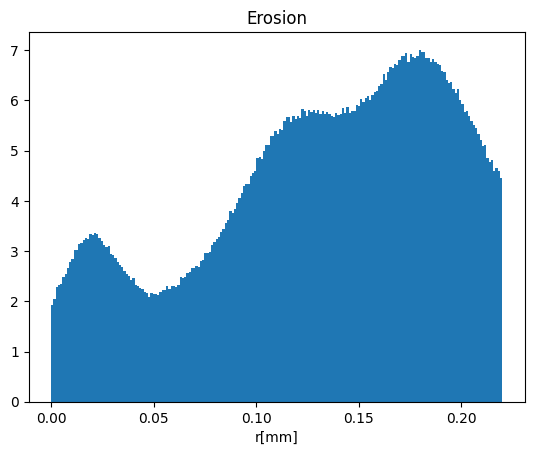

In [3]:
n_dist = 20
generate_random = np.random.rand(40)
# np.random.seed(125)
# sigma = np.array([0.01, 0.02])
sigma = (generate_random[:20] + 0.1)*0.1
mu = generate_random[20:]*0.25
# mu = np.array([0.1, 0.2])

print(n_dist)
print(sigma.shape)
print(mu.shape)
print('---------------------')

a = sampleGen(n_dist, sigma, mu)
nptest = np.histogram(a, bins=200, range=[0, 0.22], density=True)
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)

print(np.allclose(nptest[0], dist[0]))
print(np.allclose(nptest[1], dist[1]))

distGen = dist[0]*1e3
# dist = axs.hist(a, bins = 100)
axs.set_title('Erosion')
axs.set_xlabel('r[mm]')

print(distGen)
print(np.sum(distGen))
distNorm = distGen*dist[1][1:]*2*np.pi

print(np.sum(distNorm))
print(distGen.shape)

In [4]:
import torch
from objectFunc_Guass import StepCoverage

In [5]:
stepCover = StepCoverage(10)
base = torch.rand(1,40, device='cuda:0')
inputs_r = stepCover.generate_input(9, base)
print(inputs_r.shape)

torch.Size([9, 40])


20
(20,)
(20,)
---------------------
True
True
[3192.37793225 3205.24782917 3235.49208694 3344.88621081 3342.95572627
 3407.94870574 3443.98441713 3384.13939643 3410.52268512 3443.34092228
 3489.02905637 3582.33580907 3550.16106676 3565.60494307 3600.99715961
 3572.68338638 3577.83134515 3661.48567516 3631.24141739 3701.38235563
 3660.84218031 3674.35557209 3738.06156186 3727.12214948 3737.41806702
 3753.50543817 3684.00799478 3714.25225255 3810.13298464 3750.28796394
 3771.52329387 3760.58388148 3761.22737633 3750.28796394 3747.07048971
 3837.15976819 3832.01180942 3855.82111873 3770.87979902 3820.42890218
 3777.31474749 3906.01371674 3845.52520119 3830.08132488 3798.55007741
 3800.48056195 3792.11512895 3682.72100509 3847.45568573 3811.41997434
 3814.63744857 3805.62852072 3833.29879911 3795.33260318 3812.70696403
 3822.35938672 3864.18655173 3922.74458274 3768.94931448 3882.84790227
 3868.04752081 3833.29879911 3882.20440742 3768.30581964 3860.32558265
 3877.05644865 3799.19357226 3

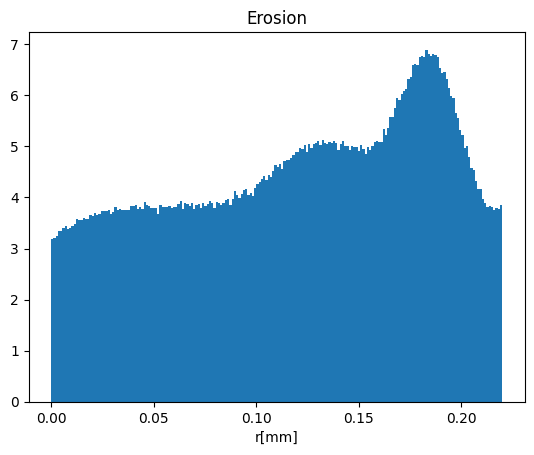

In [13]:
sigma = (base[0].cpu().numpy()[:20] + 0.1)*0.1
mu = base[0].cpu().numpy()[20:]*0.25
# mu = np.array([0.1, 0.2])

print(n_dist)
print(sigma.shape)
print(mu.shape)
print('---------------------')

a = sampleGen(n_dist, sigma, mu)
nptest = np.histogram(a, bins=200, range=[0, 0.22], density=True)
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)

print(np.allclose(nptest[0], dist[0]))
print(np.allclose(nptest[1], dist[1]))

distGen = dist[0]*1e3
# dist = axs.hist(a, bins = 100)
axs.set_title('Erosion')
axs.set_xlabel('r[mm]')

print(distGen)
print(np.sum(distGen))
distNorm = distGen*dist[1][1:]*2*np.pi

print(np.sum(distNorm))
print(distGen.shape)

20
(20,)
(20,)
---------------------
True
True
[3214.74420479 3216.67536871 3305.50890901 3275.2540076  3352.50056438
 3371.16848227 3384.68662971 3481.88854699 3436.82805554 3420.73502287
 3469.65784217 3476.73877654 3487.03831745 3525.66159584 3600.33326739
 3626.08211966 3579.09046428 3611.27652961 3718.13426649 3667.92400458
 3628.01328358 3753.53893835 3730.36497131 3659.5556276  3722.64031563
 3788.2998889  3707.83472558 3712.34077473 3731.00869262 3693.67285684
 3794.09338066 3897.0887897  3678.86726679 3791.51849543 3766.41336448
 3815.97990508 3819.84223292 3830.78549513 3806.32408548 3797.31198719
 3731.65241393 3754.18265965 3864.90272438 3833.36038036 3880.99575704
 3842.37247865 3796.02454458 3771.56313493 3810.18641332 3774.78174146
 3826.27944599 3816.62362639 3700.11006991 3840.44131473 3859.75295392
 3902.88228146 3792.80593805 3761.90731533 3843.01619995 3885.50180619
 3885.50180619 3799.88687242 3921.55019935 3833.36038036 3947.29905161
 3808.2552494  3864.25900307 3

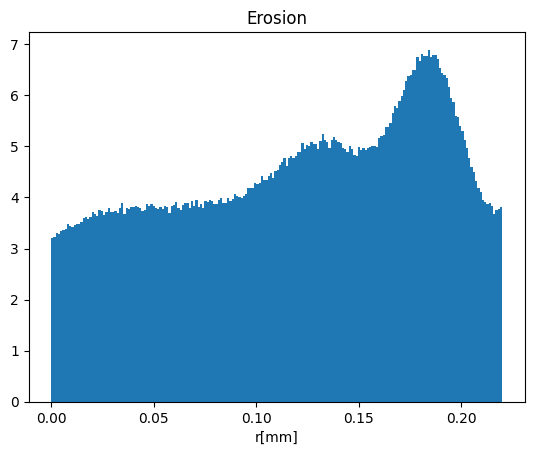

In [21]:
n = 2

sigma = (inputs_r[n].cpu().numpy()[:20] + 0.1)*0.1
mu = inputs_r[n].cpu().numpy()[20:]*0.25
# mu = np.array([0.1, 0.2])

print(n_dist)
print(sigma.shape)
print(mu.shape)
print('---------------------')

a = sampleGen(n_dist, sigma, mu)
nptest = np.histogram(a, bins=200, range=[0, 0.22], density=True)
fig, axs = plt.subplots()

dist = axs.hist(a, bins = 200, range=[0, 0.22], density=True)

print(np.allclose(nptest[0], dist[0]))
print(np.allclose(nptest[1], dist[1]))

distGen = dist[0]*1e3
# dist = axs.hist(a, bins = 100)
axs.set_title('Erosion')
axs.set_xlabel('r[mm]')

print(distGen)
print(np.sum(distGen))
distNorm = distGen*dist[1][1:]*2*np.pi

print(np.sum(distNorm))
print(distGen.shape)

In [16]:
torch.rand(2, 3)

tensor([[0.7903, 0.4615, 0.0322],
        [0.7622, 0.4203, 0.0627]])

In [9]:
test_random = np.random.rand(200)

test_random_norm = test_random/(np.sum(test_random))

print(np.sum(test_random_norm))

test_random_Renorm = test_random_norm * 909090

print(test_random_Renorm)

print(np.sum(test_random_Renorm))

# fig, ax0 = plt.subplots(1, 1, layout='constrained')

# ax0.plot(np.linspace(0, 0.22, 200), test_random_Renorm)
# plt.show()
# print(np.floor(test_random_Renorm))

0.9999999999999999
[3808.95515164 3090.1168761  2611.6046227  7719.7734959  5466.76996226
 5286.88592345 5542.4933086  3371.35507907 2091.13057828 8352.89659062
 4838.81330216 2961.15147939 4773.23655127 8029.90299097 1727.06315002
 6845.60495145 8514.70553154 8144.3956587  3117.86592954  207.8808013
 1367.5489912  8531.35916873 9151.42195917 8635.86911102 8796.92963221
  400.41497937 4418.81634231  506.98919076 8878.99507419 5633.67407605
 5307.64829575 6234.29427339 9065.56038485 4595.71665729  190.77277707
 8794.4109     3880.02467125 2733.35439448 8295.59000546 3376.91534467
 6305.47171714 4595.56071666  956.19944802 2580.1001275   880.45869564
 1332.94134214 6240.6261672  1879.44891218 4845.51396813 4836.89978888
 1986.10105763 4995.62889189 5715.95748076 3340.95527591 1971.99117238
 6307.75574646 1976.30792921 7873.73161613  457.94964199 7198.23748652
 2689.76561497 9000.87142678 4906.57714108 2804.90963232  454.28091307
 1791.61671614 8070.44117253 7816.25720225 4354.80627052 41

(637537,)


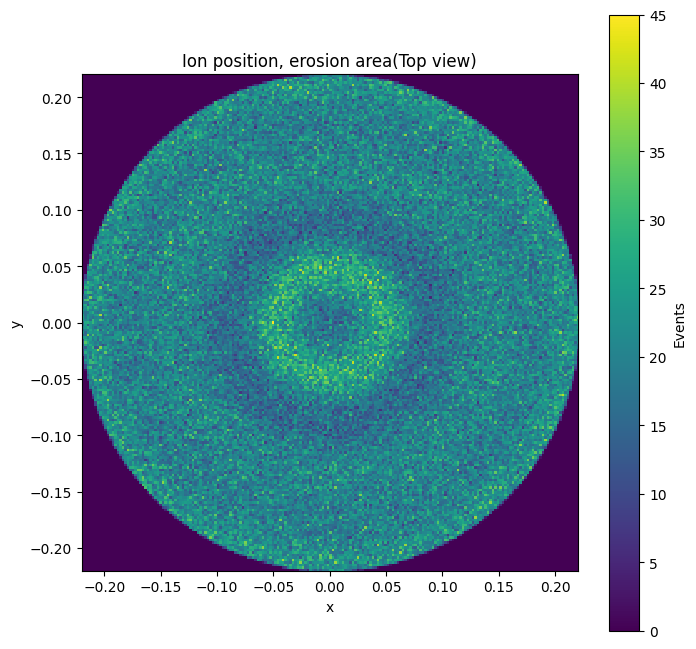

In [4]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(distNorm[0][i])
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(distNorm[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [5]:
def distGenerator(bins=200):
    n_dist = 20
    sigma = (np.random.rand(n_dist) + 0.1)*0.1
    mu = np.random.rand(n_dist)*0.25
    a = sampleGen(n_dist, sigma, mu)
    dist = np.histogram(a, bins=bins, range=[0, 0.22], density=True)
    distGen = dist[0]*1e3
    distNorm = distGen*dist[1][1:]*2*np.pi
    print(np.sum(distNorm))       
    gen_dist_x = np.array([])
    gen_dist_y = np.array([])
    r = 0.22/bins
    for i in range(bins):
        # print(i)
        # print(distNorm[0][i])
        theta = np.random.rand(int(distNorm[i]))*2*np.pi
        # print(theta.shape)
        # print(np.multiply((np.random.rand(int(distNorm[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
        gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
        # print(np.array(gen_dist_x).shape)
        gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

    return [gen_dist_x, gen_dist_y], distGen


In [24]:
def sampleGenTrain():
    print('----sampleGenTrain----')
    test_random = np.random.rand(200)
    test_random_norm = test_random/(np.sum(test_random))
    test_random_norm = test_random_norm * 909090
    print('----sampleGenTrain-after---')
    return test_random_norm

def distGeneratorTrain(bins=200):
    print('----distGeneratorTrain----')
    a = sampleGenTrain()
    distGen = a
    print(np.sum(a))
    distNorm = distGen*np.linspace(0, 0.22, 201)[1:]*2*np.pi     
    gen_dist_x = np.array([])
    gen_dist_y = np.array([])
    r = 0.22/bins
    for i in range(bins):
        # print(i)
        # print(int(distNorm[i]))
        theta = np.random.rand(int(distNorm[i]))*2*np.pi
        gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
        gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))
    print('----distGeneratorTrain-after---')
    return [gen_dist_x, gen_dist_y], distGen

In [25]:
def GeneratorInput():
    sampleList = []
    distList = []
    for i in range(10):
        print(i)
        sample = distGeneratorTrain()
        print('---------')
        print(i)
        sampleList.append(sample[0])
        distList.append(sample[1])

    return sampleList, distList

In [26]:
a = GeneratorInput()

0
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909090.0
----distGeneratorTrain-after---
---------
0
1
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909090.0
----distGeneratorTrain-after---
---------
1
2
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909090.0000000001
----distGeneratorTrain-after---
---------
2
3
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909090.0
----distGeneratorTrain-after---
---------
3
4
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909090.0000000001
----distGeneratorTrain-after---
---------
4
5
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909090.0000000002
----distGeneratorTrain-after---
---------
5
6
----distGeneratorTrain----
----sampleGenTrain----
----sampleGenTrain-after---
909089.9999999999
----distGeneratorTrain-after---
---------
6
7
----distGeneratorTrain----
----

In [33]:
print(a[1][0].shape)
print(np.sum(a[1][0]))

(200,)
909090.0


In [6]:
sampleList = []
distList = []
for i in range(100):
    sample = distGenerator()
    sampleList.append(sample[0])
    distList.append(sample[1])

674349.6311207637
640429.9546003235
629008.4779347684
636945.4107844033
768671.0624689881
788826.7023172617
699825.0134397827
687205.7046326975
653069.3678451369
740266.2932530481
617897.6701600654
627163.899324822
667237.0292980095
671123.9279871382
641449.9413385494
709423.6423630859
722921.0436889066
636214.4844804164
551628.2122153935
697767.0860341941
654698.3263728279
587216.1857266009
634716.8033653733
642998.5964291506
577558.5487920919
627169.1441509633
712754.9998400174
678453.6949199112
741362.7611022828
773566.5562082161
654876.3665543299
638276.0146442901
599604.1476034533
606334.0834785802
672875.6458602574
656448.6823255864
685803.5336063294
679352.2990367832
726539.8678900526
687474.5670165796
547479.953078235
778486.5230483211
683682.0078094346
596567.4318181119
688834.1037968291
636706.2568778151
628153.3800334537
593568.8699827474
675985.310845328
689107.5194652281
601016.114995796
645068.840046757
602561.1949996105
709331.0220384598
632469.6721219828
612646.86672185

In [14]:
print(len(distList[0]))
print(np.sum(distList[0]))

200
909090.9090909092


In [7]:
np.savez('./distList_100samples', distList)

In [8]:
def coverDist(coordinates, Ero_dist_xy):
    test = depoML.depo(param = [1.6, -0.7], TS = 0.11, N = Ero_dist_xy[0].shape[0], sub_xy=coordinates)
    coverage = test.coverage(1, 125, Ero_dist_xy[0], Ero_dist_xy[1])
    return coverage

In [75]:
xs = np.linspace(0,0.21,3)
ys = 0

num_jobs = 60  # Number of parallel jobs
coverdist = Parallel(n_jobs=num_jobs, verbose=25)(
    delayed(coverDist)([x, ys], Ero_dist_xy) for Ero_dist_xy in sampleList for x in xs 
)

[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


In [10]:
print(coverdist)
np.savez('./StepCover_100samples', coverdist)

[0.2772, 0.25256, 0.19328, 0.28736, 0.25496, 0.19576, 0.28152, 0.25176, 0.186, 0.2764, 0.25344, 0.18664, 0.28624, 0.26264, 0.21672, 0.27416, 0.2552, 0.21496, 0.28512, 0.25104, 0.20144, 0.28816, 0.25544, 0.19544, 0.26952, 0.24832, 0.19232, 0.28216, 0.25752, 0.2088, 0.28096, 0.25184, 0.18624, 0.27024, 0.25232, 0.18632, 0.27744, 0.25224, 0.19496, 0.27888, 0.2508, 0.19848, 0.2616, 0.25288, 0.18504, 0.2816, 0.25456, 0.20424, 0.29016, 0.25776, 0.20648, 0.27704, 0.24984, 0.18688, 0.2412, 0.23728, 0.16912, 0.2852, 0.25312, 0.2024, 0.2924, 0.25736, 0.19944, 0.26096, 0.24448, 0.1712, 0.274, 0.24544, 0.19232, 0.26776, 0.24912, 0.18832, 0.2476, 0.2392, 0.17376, 0.26, 0.24496, 0.18144, 0.28312, 0.25088, 0.20584, 0.27384, 0.25832, 0.19064, 0.28552, 0.25528, 0.2112, 0.28168, 0.264, 0.21464, 0.2868, 0.2536, 0.19712, 0.2796, 0.25416, 0.1896, 0.27536, 0.2512, 0.18112, 0.26368, 0.23976, 0.17568, 0.2744, 0.24608, 0.19552, 0.27576, 0.252, 0.1936, 0.28504, 0.25624, 0.19864, 0.28656, 0.26024, 0.1936, 0.27856

In [4]:
def test(xy, xy_list):
    return [xy, xy_list]

xs = np.linspace(0,0.21,3)


x_list_l = [1, 2, 3]
y_list_l = [5, 6, 7]
xy_list_l = [x_list_l, y_list_l]

num_jobs = 25  # Number of parallel jobs
coverdist = Parallel(n_jobs=num_jobs, verbose=25)(
    delayed(test)(x, xy_list) for xy_list in xy_list_l for x in xs
)

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=25)]: Done   2 out of   6 | elapsed:    1.1s remaining:    2.2s
[Parallel(n_jobs=25)]: Done   3 out of   6 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=25)]: Done   4 out of   6 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=25)]: Done   6 out of   6 | elapsed:    1.1s finished


In [80]:
print(coverdist)

[[0.0, [1, 2, 3]], [0.105, [1, 2, 3]], [0.21, [1, 2, 3]], [0.0, [5, 6, 7]], [0.105, [5, 6, 7]], [0.21, [5, 6, 7]]]


In [39]:
a = np.load('./distList_100samples.npz')
print(a['arr_0'])

[[3765.8956976  3776.06863887 3704.85804996 ... 3158.69826535
  3131.35848568 3107.19775015]
 [2243.25978889 2299.05070592 2370.53281837 ... 2965.05477796
  2934.83469791 2883.69302396]
 [1971.39019317 2098.62817755 2169.43425254 ... 2008.12417192
  1944.77136798 1932.5267084 ]
 ...
 [1944.18556812 1972.69268789 1994.92824131 ... 3232.1372392
  3098.72391869 2954.47789267]
 [2800.07598286 2874.31799749 3012.56174888 ... 3826.02382298
  3738.34144363 3746.02165204]
 [3189.92577356 3377.64541617 3471.83227518 ... 5946.19955043
  5910.22540289 5811.46001601]]


In [53]:
a = np.load('./StepCover_100samples.npz')
print(a['arr_0'])
b = a['arr_0']
# print(np.array(b))
# print(torch.Tensor(b))
# print(torch.Tensor(b).shape)

# print(torch.Tensor(b).reshape((3, 100)).shape)

[0.2772  0.25256 0.19328 0.28736 0.25496 0.19576 0.28152 0.25176 0.186
 0.2764  0.25344 0.18664 0.28624 0.26264 0.21672 0.27416 0.2552  0.21496
 0.28512 0.25104 0.20144 0.28816 0.25544 0.19544 0.26952 0.24832 0.19232
 0.28216 0.25752 0.2088  0.28096 0.25184 0.18624 0.27024 0.25232 0.18632
 0.27744 0.25224 0.19496 0.27888 0.2508  0.19848 0.2616  0.25288 0.18504
 0.2816  0.25456 0.20424 0.29016 0.25776 0.20648 0.27704 0.24984 0.18688
 0.2412  0.23728 0.16912 0.2852  0.25312 0.2024  0.2924  0.25736 0.19944
 0.26096 0.24448 0.1712  0.274   0.24544 0.19232 0.26776 0.24912 0.18832
 0.2476  0.2392  0.17376 0.26    0.24496 0.18144 0.28312 0.25088 0.20584
 0.27384 0.25832 0.19064 0.28552 0.25528 0.2112  0.28168 0.264   0.21464
 0.2868  0.2536  0.19712 0.2796  0.25416 0.1896  0.27536 0.2512  0.18112
 0.26368 0.23976 0.17568 0.2744  0.24608 0.19552 0.27576 0.252   0.1936
 0.28504 0.25624 0.19864 0.28656 0.26024 0.1936  0.27856 0.25376 0.20848
 0.28208 0.25304 0.20056 0.25176 0.24352 0.16968 0.296

In [55]:
print(torch.Tensor(b).shape)

print(torch.Tensor(b).reshape((100, 3)))

torch.Size([300])
tensor([[0.2772, 0.2526, 0.1933],
        [0.2874, 0.2550, 0.1958],
        [0.2815, 0.2518, 0.1860],
        [0.2764, 0.2534, 0.1866],
        [0.2862, 0.2626, 0.2167],
        [0.2742, 0.2552, 0.2150],
        [0.2851, 0.2510, 0.2014],
        [0.2882, 0.2554, 0.1954],
        [0.2695, 0.2483, 0.1923],
        [0.2822, 0.2575, 0.2088],
        [0.2810, 0.2518, 0.1862],
        [0.2702, 0.2523, 0.1863],
        [0.2774, 0.2522, 0.1950],
        [0.2789, 0.2508, 0.1985],
        [0.2616, 0.2529, 0.1850],
        [0.2816, 0.2546, 0.2042],
        [0.2902, 0.2578, 0.2065],
        [0.2770, 0.2498, 0.1869],
        [0.2412, 0.2373, 0.1691],
        [0.2852, 0.2531, 0.2024],
        [0.2924, 0.2574, 0.1994],
        [0.2610, 0.2445, 0.1712],
        [0.2740, 0.2454, 0.1923],
        [0.2678, 0.2491, 0.1883],
        [0.2476, 0.2392, 0.1738],
        [0.2600, 0.2450, 0.1814],
        [0.2831, 0.2509, 0.2058],
        [0.2738, 0.2583, 0.1906],
        [0.2855, 0.2553, 0.211

In [43]:
import torch

In [83]:
a = torch.Tensor([1,2,3])
print(a[1:])

tensor([2., 3.])


In [112]:
a = torch.rand(2,4)- 0.5
print(a)
# torch.sum(a, 1)
print(torch.sum(a, 1))
print(torch.sum(a, 1).reshape(2,1).shape)
b = torch.div(a.T, torch.sum(a, 1))
print(b)
print(b.shape)
print(b.T)
print(torch.sum(b.T, 1))

tensor([[-0.1892,  0.1864,  0.0059, -0.3597],
        [ 0.2104, -0.3197, -0.2690, -0.3014]])
tensor([-0.3567, -0.6796])
torch.Size([2, 1])
tensor([[ 0.5305, -0.3097],
        [-0.5226,  0.4704],
        [-0.0165,  0.3958],
        [ 1.0086,  0.4435]])
torch.Size([4, 2])
tensor([[ 0.5305, -0.5226, -0.0165,  1.0086],
        [-0.3097,  0.4704,  0.3958,  0.4435]])
tensor([1., 1.])


In [100]:
a = torch.tensor([[-0.3711, -1.9353, -0.4605, -0.2917, -0.2917],
                  [ 0.1815, -1.0111,  0.9805, -1.5923, -0.2917],
                  [ 0.1062,  1.4581,  0.7759, -1.2344, -0.2917],
                  [-0.1830, -0.0313,  1.1908, -1.4757, -0.2917]])

print(a.shape)
b = torch.tensor([ 0.8032,  0.2930, -0.8113, -0.2308])
torch.div(a, b)

torch.Size([4, 5])


RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 1

In [98]:
-0.3711/0.8032

-0.46202689243027883

In [82]:
base = torch.rand(1, 200)
new_random = base + torch.rand(90, 200)
p = torch.linspace(0, 1, 90)
rand = torch.rand_like(new_random)
mask = rand < p.unsqueeze(-1) 
idx = torch.randperm(mask.shape[0])
# print(mask.shape)
# print(rand.shape)
# print(idx)
mask = mask[idx, :]  # randomly permute the mask
inputs = base.repeat(90, 1)
print(mask)
inputs = torch.where(mask, new_random, inputs)
print(mask.shape)
print(new_random)
print(inputs)

# inputs.masked_fill_(inputs > 1., 1.)
# inputs.masked_fill_(inputs < 0., 0.)

# print(inputs)

tensor([[False,  True, False,  ...,  True,  True,  True],
        [ True, False, False,  ..., False, False,  True],
        [False,  True, False,  ..., False, False, False],
        ...,
        [ True, False,  True,  ..., False, False,  True],
        [ True, False,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False,  True, False]])
torch.Size([90, 200])
tensor([[0.5159, 0.6700, 1.5818,  ..., 0.3471, 0.8278, 1.1924],
        [1.3406, 0.9282, 1.5124,  ..., 1.1292, 0.3968, 0.9390],
        [1.4422, 0.1789, 1.7375,  ..., 1.1399, 0.0993, 0.9305],
        ...,
        [1.3585, 0.9330, 1.3243,  ..., 0.6702, 0.4466, 1.5289],
        [0.7762, 0.1710, 1.2232,  ..., 1.1264, 0.9559, 1.0446],
        [0.5498, 0.7614, 1.1575,  ..., 0.6923, 0.3502, 1.0449]])
tensor([[0.4779, 0.6700, 0.8110,  ..., 0.3471, 0.8278, 1.1924],
        [1.3406, 0.0754, 0.8110,  ..., 0.1841, 0.0634, 0.9390],
        [0.4779, 0.1789, 0.8110,  ..., 0.1841, 0.0634, 0.6437],
        ...,
        [1.35

In [94]:
a = np.load('./distList_100samples.npz')
b = a['arr_0']
inputs = torch.tensor(b/1e4, device='cuda:0', dtype=torch.float32)
print(inputs)

tensor([[0.3766, 0.3776, 0.3705,  ..., 0.3159, 0.3131, 0.3107],
        [0.2243, 0.2299, 0.2371,  ..., 0.2965, 0.2935, 0.2884],
        [0.1971, 0.2099, 0.2169,  ..., 0.2008, 0.1945, 0.1933],
        ...,
        [0.1944, 0.1973, 0.1995,  ..., 0.3232, 0.3099, 0.2954],
        [0.2800, 0.2874, 0.3013,  ..., 0.3826, 0.3738, 0.3746],
        [0.3190, 0.3378, 0.3472,  ..., 0.5946, 0.5910, 0.5811]],
       device='cuda:0')


In [95]:
outputsFile = np.load('./StepCover_100samples.npz')
outputs_all = torch.tensor((outputsFile['arr_0']).reshape((100,3))/1e3, device='cuda:0', dtype=torch.float32)
outputs = torch.sum(outputs_all, dim=1)
outputs = outputs.reshape(100,1)
print(outputs)

tensor([[0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0008],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0008],
        [0.0007],
        [0.0006],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0008],
        [0.0008],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0008],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0

In [81]:
base = torch.rand(1, 72)
new_random = base + torch.rand(90, 72)
p = torch.linspace(0, 1, 90)
rand = torch.rand_like(new_random)
mask = rand < p.unsqueeze(-1) 
idx = torch.randperm(mask.shape[0])
# print(mask.shape)
# print(rand.shape)
# print(idx)
mask = mask[idx, :]  # randomly permute the mask
inputs = base.repeat(90, 1)
print(mask)
inputs = torch.where(mask, new_random, inputs)
print(mask.shape)
print(new_random)
print(inputs)

inputs.masked_fill_(inputs > 1., 1.)
inputs.masked_fill_(inputs < 0., 0.)

print(inputs)

tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ...,  True,  True, False],
        ...,
        [ True, False, False,  ..., False, False, False],
        [ True, False,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])
torch.Size([90, 72])
tensor([[1.4239, 1.2958, 1.1568,  ..., 1.0800, 0.6234, 0.8521],
        [1.4527, 0.8815, 0.9568,  ..., 0.2174, 0.8976, 1.1345],
        [1.0973, 1.5789, 1.1099,  ..., 0.2925, 1.5593, 1.0322],
        ...,
        [1.3916, 1.6416, 1.1491,  ..., 0.4090, 1.4344, 1.1028],
        [1.2035, 1.1301, 0.3932,  ..., 0.2474, 1.3613, 1.0190],
        [0.6966, 0.7789, 1.0068,  ..., 0.5603, 1.3014, 1.7264]])
tensor([[1.4239, 1.2958, 1.1568,  ..., 1.0800, 0.6234, 0.8521],
        [0.5956, 0.8815, 0.9568,  ..., 0.1096, 0.8976, 0.7534],
        [1.0973, 1.5789, 1.1099,  ..., 0.2925, 1.5593, 0.7534],
        ...,
        [1.391

In [71]:
p = torch.linspace(0, 1, 5)
print(p)
p.unsqueeze(-1) 

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


tensor([[0.0000],
        [0.2500],
        [0.5000],
        [0.7500],
        [1.0000]])

In [67]:
outputsFile = np.load('./StepCover_100samples.npz')

b = outputsFile['arr_0']
outputs = torch.Tensor(b).reshape((100,3))
outputs_all = torch.sum(outputs, dim=1)
# print(torch.Tensor(b))
print(outputs.shape)
print(outputs_all.shape)
print(outputs[0])
print(outputs_all[0])
torch.allclose(torch.sum(outputs[0]), outputs_all[0])

torch.Size([100, 3])
torch.Size([100])
tensor([0.2772, 0.2526, 0.1933])
tensor(0.7230)


True

In [113]:
a = torch.rand(2, 3)
r = 0.5
print(a)
accept: torch.Tensor = a > r
print(accept)

tensor([[0.1531, 0.2334, 0.5302],
        [0.0254, 0.2843, 0.6080]])
tensor([[False, False,  True],
        [False, False,  True]])


In [121]:
from objectFunc import StepCoverage

In [122]:
stepCover = StepCoverage(100)
func = stepCover.get_function()
base = torch.zeros((1, 200), device=stepCover.device)
inputs_r = stepCover.generate_input(100, base)
print(inputs_r.shape)

torch.Size([100, 200])


In [123]:
print(inputs_r[0])

tensor([6.0323e-01, 8.8484e-01, 5.1922e-01, 8.0722e-01, 6.9427e-01, 0.0000e+00,
        1.5068e-01, 4.6998e-01, 9.5772e-01, 8.3330e-01, 3.4864e-01, 3.5610e-01,
        4.7668e-01, 8.0512e-01, 0.0000e+00, 8.8216e-01, 1.5432e-01, 7.3810e-01,
        7.0628e-01, 3.8662e-01, 3.3149e-01, 3.1862e-01, 0.0000e+00, 6.7578e-01,
        8.3049e-01, 6.8411e-01, 3.8443e-01, 0.0000e+00, 4.2745e-01, 0.0000e+00,
        7.1331e-01, 6.4709e-01, 2.4661e-01, 1.5285e-01, 2.1724e-02, 0.0000e+00,
        0.0000e+00, 3.0687e-01, 9.9647e-01, 6.5313e-01, 2.1949e-01, 4.0444e-01,
        8.7014e-01, 5.5021e-01, 6.3120e-01, 8.2102e-01, 4.0113e-01, 1.7266e-01,
        8.4640e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2175e-01, 2.7348e-01,
        0.0000e+00, 9.8645e-01, 3.4934e-01, 0.0000e+00, 6.1574e-01, 5.5537e-01,
        6.0313e-01, 4.9383e-01, 2.4042e-01, 3.2297e-01, 7.7925e-01, 5.0599e-01,
        0.0000e+00, 0.0000e+00, 4.8930e-01, 5.6101e-01, 5.1505e-01, 6.2807e-01,
        5.8126e-01, 1.2845e-01, 1.0479e-

In [ ]:
outputs_new = func(inputs_r)